In [1]:
# I want to assess the degree to which stellar crowding affects my catalog
# To get a rough sense of this, I will compare the density of stars in the MCPS catalog to the density of stars in my catalog
# First, I will need to make sure I'm comparing apples to apples, by reducing the MCPS catalog to the same area and parameter space as my catalog
# Then, I will calculate how close the nearest star is to each source in the remaining MCPS catalog
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import os 
import glob 
# Get data folder in zshrc
data_dir = os.getenv("DATADIR")

mcps_files = ["4_MagellanicClouds/MCPS/table1_smc.csv","4_MagellanicClouds/MCPS/table1_lmc_fixed.csv"]
smc = pd.read_csv(data_dir + mcps_files[0])
lmc = pd.read_csv(data_dir + mcps_files[1])
lmc['ra'] = lmc['ra'] * 15
candidates = pd.read_csv(data_dir + "0_SUMS_Catalogs/FinalCatalogs/SUMS_UV_Candidate_Catalog.csv")
smc_candidates = candidates[candidates.RA < 30]
lmc_candidates = candidates[candidates.RA > 30]

### Compare the full MCPS catalog to our candidate catalog to make a number of reasonable cuts that would give us "blue-ish" sources

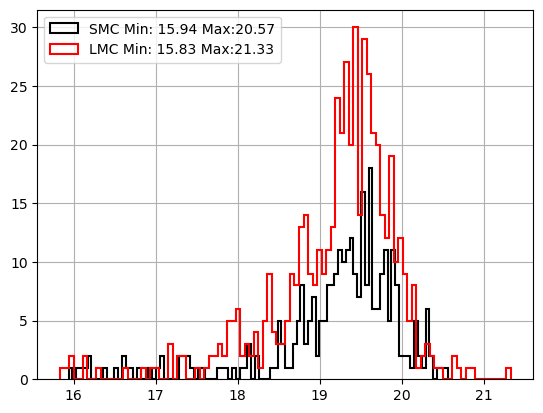

In [2]:
# 1 Cut by Vmag

smc_candidates.V.hist(bins=100, histtype='step', color='black', lw=1.5, label=f'SMC Min: {np.min(smc_candidates.V):.2f} Max:{np.max(smc_candidates.V):.2f}')
lmc_candidates.V.hist(bins=100, histtype='step', color='red', lw=1.5, label=f'LMC Min: {np.min(lmc_candidates.V):.2f} Max:{np.max(lmc_candidates.V):.2f}')
plt.legend()

SMC lost: 2992852, LMC lost: 6067889


Text(0.5, 0, 'MCPS V magnitude')

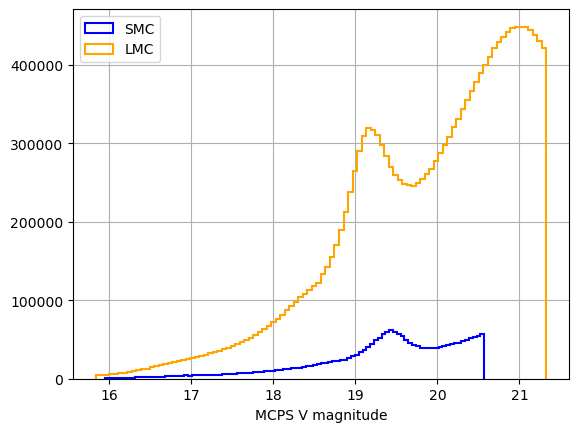

In [3]:
smc_r = smc[(smc['V'] < 20.57) & (smc['V'] > 15.94)].reset_index(drop=True)
lmc_r = lmc[(lmc['V'] < 21.33) & (lmc['V'] > 15.83)].reset_index(drop=True)
print(f'SMC lost: {len(smc)-len(smc_r)}, LMC lost: {len(lmc)-len(lmc_r)}')
smc_r['V'].hist(bins=100, histtype='step', color='blue', lw=1.5, label='SMC',zorder=100)
lmc_r['V'].hist(bins=100, histtype='step', color='orange', lw=1.5, label='LMC')
plt.legend()
plt.xlabel('MCPS V magnitude')

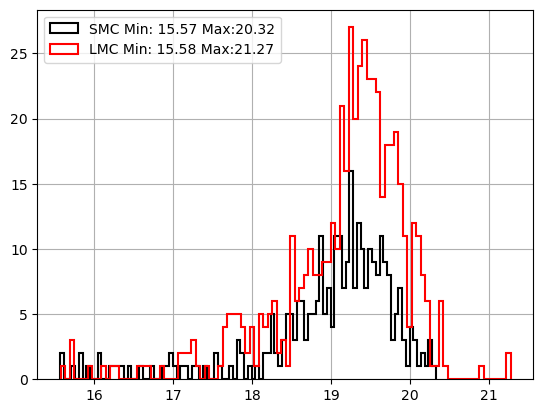

In [4]:
# 2 Cut by Bmag
smc_candidates.B.hist(bins=100, histtype='step', color='black', lw=1.5, label=f'SMC Min: {np.min(smc_candidates.B):.2f} Max:{np.max(smc_candidates.B):.2f}')
lmc_candidates.B.hist(bins=100, histtype='step', color='red', lw=1.5, label=f'LMC Min: {np.min(lmc_candidates.B):.2f} Max:{np.max(lmc_candidates.B):.2f}')
plt.legend()

SMC lost: 746568, LMC lost: 4286373


Text(0.5, 0, 'MCPS V magnitude')

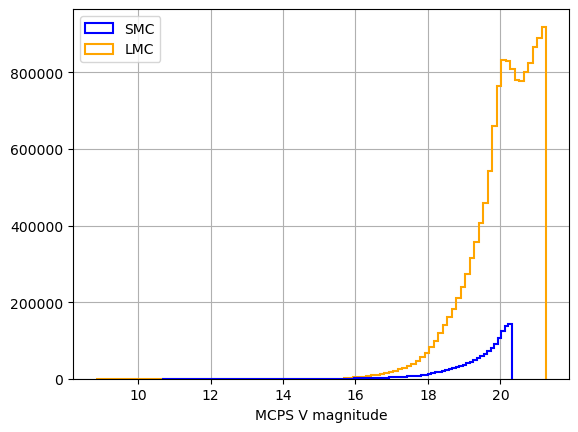

In [5]:
smc_r2 = smc_r[(smc_r['B'] < 20.32) & (smc_r['V'] > 15.57)]
lmc_r2 = lmc_r[(lmc_r['B'] < 21.27) & (lmc_r['V'] > 15.58)]
print(f'SMC lost: {len(smc_r)-len(smc_r2)}, LMC lost: {len(lmc_r)-len(lmc_r2)}')
smc_r2['B'].hist(bins=100, histtype='step', color='blue', lw=1.5, label='SMC',zorder=100)
lmc_r2['B'].hist(bins=100, histtype='step', color='orange', lw=1.5, label='LMC')
plt.legend()
plt.xlabel('MCPS V magnitude')

Text(0.5, 1.0, 'Dashed Lines are 16,50,84th percentiles')

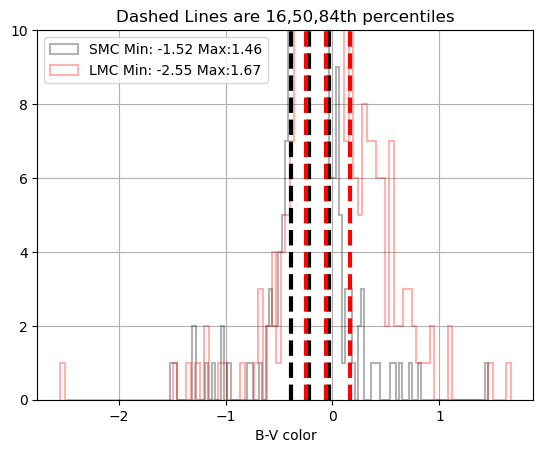

In [6]:
# 3 Cut by B-V color

smc_candidates_B_V = smc_candidates.B - smc_candidates.V
lmc_candidates_B_V = lmc_candidates.B - lmc_candidates.V

smc_candidates_B_V.hist(bins=100, histtype='step', color='black', lw=1.5,alpha=0.3, label=f'SMC Min: {np.min(smc_candidates_B_V):.2f} Max:{np.max(smc_candidates_B_V):.2f}')
lmc_candidates_B_V.hist(bins=100, histtype='step', color='red', lw=1.5,alpha=0.3, label=f'LMC Min: {np.min(lmc_candidates_B_V):.2f} Max:{np.max(lmc_candidates_B_V):.2f}')
# Plot vertical lines corresponding to quantiles 

smc_candidates_B_V_quantiles = np.percentile(smc_candidates_B_V, [16,50,84])
lmc_candidates_B_V_quantiles = np.percentile(lmc_candidates_B_V, [16, 50, 84])
for q in smc_candidates_B_V_quantiles:
    plt.axvline(q, color='black', linestyle='--', lw=3)
for q in lmc_candidates_B_V_quantiles:
    plt.axvline(q, color='red', linestyle='--', lw=3)
# Plot vertical lines corresponding to 1 2 3 sigma 


plt.xlabel('B-V color')
plt.legend()
plt.ylim(0,10)
plt.title('Dashed Lines are 16,50,84th percentiles')

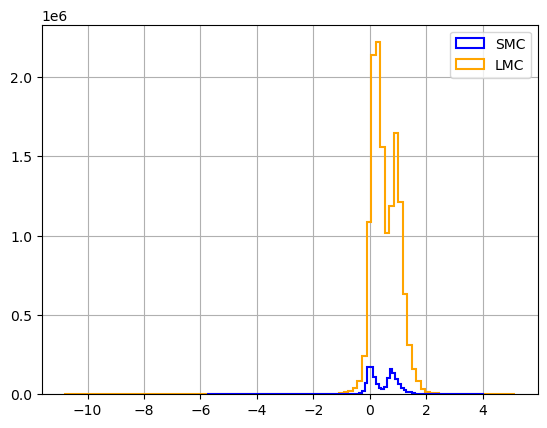

In [7]:
smc_B_V = smc_r2['B'] - smc_r2['V']
lmc_B_V = lmc_r2['B'] - lmc_r2['V']
smc_B_V.hist(bins=100,  histtype='step', color='blue', lw=1.5, label='SMC',zorder=100)
lmc_B_V.hist(bins=100,  histtype='step', color='orange', lw=1.5, label='LMC')
plt.legend()

SMC lost: 725967, LMC lost: 6540789


Text(0.5, 0, 'B-V color')

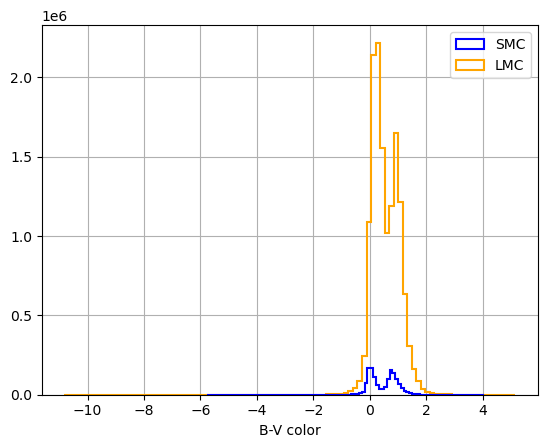

In [8]:
smc_r3 = smc_r2[(smc_B_V > -2) & (smc_B_V < 0.5)]
lmc_r3 = lmc_r2[(lmc_B_V > -2) & (lmc_B_V < 0.5)]
print(f'SMC lost: {len(smc_r2)-len(smc_r3)}, LMC lost: {len(lmc_r2)-len(lmc_r3)}')
smc_B_V_2 = smc_r2['B'] - smc_r2['V']
lmc_B_V_2 = lmc_r2['B'] - lmc_r2['V']
smc_B_V_2.hist(bins=100,  histtype='step', color='blue', lw=1.5, label='SMC',zorder=100)
lmc_B_V_2.hist(bins=100,  histtype='step', color='orange', lw=1.5, label='LMC')
plt.legend()
plt.xlabel('B-V color')

Text(0, 0.5, 'Dec')

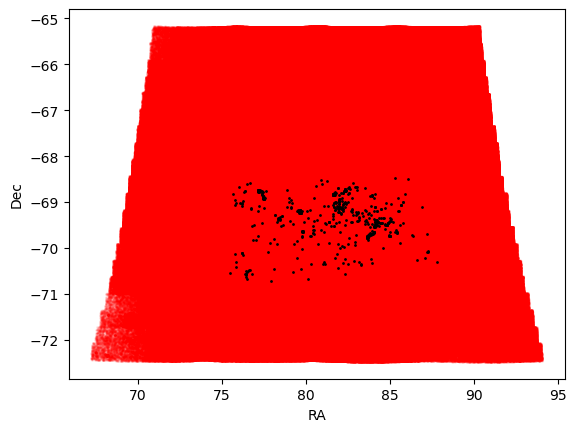

In [9]:
# 4 Cut by RA/Dec
plt.scatter(lmc_candidates.RA, lmc_candidates.Dec, s=1, c='black', alpha=1,zorder=100)
plt.scatter(lmc_r3.ra, lmc_r3.dec, s=1, c='red', alpha=0.1)
plt.xlabel('RA')
plt.ylabel('Dec')

Text(0, 0.5, 'Dec')

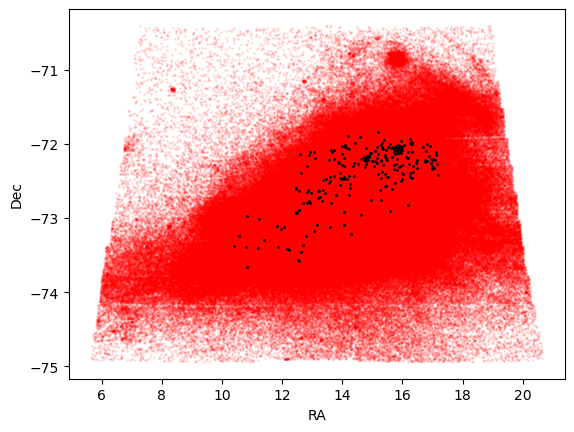

In [10]:
plt.scatter(smc_candidates.RA, smc_candidates.Dec, s=1, c='black', alpha=1,zorder=100)
plt.scatter(smc_r3.ra, smc_r3.dec, s=1, c='red', alpha=0.1)
plt.xlabel('RA')
plt.ylabel('Dec')

Text(0, 0.5, 'Dec')

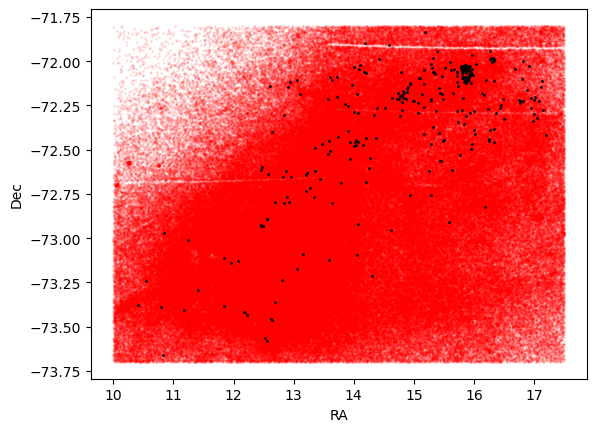

In [11]:
smc_r4 = smc_r3[(smc_r3['ra']<17.5) & (smc_r3['ra']>10) & (smc_r3['dec']<-71.8) & (smc_r3['dec']>-73.7)]
plt.scatter(smc_candidates.RA, smc_candidates.Dec, s=1, c='black', alpha=1,zorder=100)
plt.scatter(smc_r4.ra, smc_r4.dec, s=1, c='red', alpha=0.1)
plt.xlabel('RA')
plt.ylabel('Dec')

Text(0, 0.5, 'Dec')

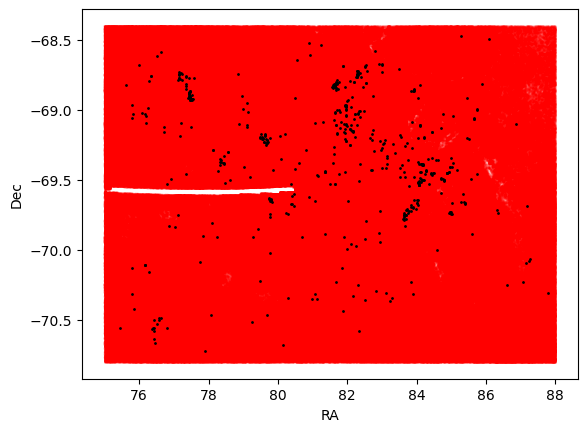

In [12]:
lmc_r4 = lmc_r3[(lmc_r3['ra']<88) & (lmc_r3['ra']>75) & (lmc_r3['dec']<-68.4) & (lmc_r3['dec']>-70.8)]
plt.scatter(lmc_candidates.RA, lmc_candidates.Dec, s=1, c='black', alpha=1,zorder=100)
plt.scatter(lmc_r4.ra, lmc_r4.dec, s=1, c='red', alpha=0.1)
plt.xlabel('RA')
plt.ylabel('Dec')


#### Calculate the nearest neighbor to our selected "blue-ish" candidates

In [13]:
smc = pd.read_csv(data_dir + mcps_files[0])
lmc = pd.read_csv(data_dir + mcps_files[1])
lmc['ra'] = lmc['ra'] * 15

# Brighter than our detection limit 
detection_limit = 20.5
lmc = lmc[lmc['B'] < detection_limit].reset_index(drop=True)
smc = smc[smc['B'] < detection_limit].reset_index(drop=True)

smc_candidate_like = smc_r4.copy().reset_index(drop=True)
lmc_candidate_like = lmc_r4.copy().reset_index(drop=True)

# Check what is a reasonable box within to calculate neighbors
width = 0.005
test_co1 = SkyCoord(ra=smc_candidate_like.loc[0,'ra'], dec=smc_candidate_like.loc[0,'dec'], unit='deg')
test_co2 = SkyCoord(ra=smc_candidate_like.loc[0,'ra']+width, dec=smc_candidate_like.loc[0,'dec']+width, unit='deg')
sep = test_co1.separation(test_co2).arcsec
print(f'Separation of two points seperated by {width} is {sep} arcsec')

Separation of two points seperated by 0.005 is 18.721262141831836 arcsec


In [14]:
# For each row in the reduced mcps catalog, calculate the distance to every other row 
# Takes a while to run, so I will save the results to a csv
run = False
if run:
    counter = 0
    for ind, row in smc_candidate_like.iterrows():
        # Get all rows in the smc catalog above our detection limit
        rows = smc[(smc['ra']<row['ra']+width) & (smc['ra']>row['ra']-width) & (smc['dec']<row['dec']+width) & (smc['dec']>row['dec']-width)]
        # Get the seperation between the blue like source and all other sources
        coord = SkyCoord(ra=row['ra'], dec=row['dec'], unit='deg')
        coord2 = SkyCoord(ra=rows['ra'], dec=rows['dec'], unit='deg')
        sep = coord.separation(coord2).arcsecond
        sep = sep[sep!=0] # Remove the distance to itself
        # If there is nearby sources, get the minimum distance
        if len(sep) == 0:
            smc_candidate_like.loc[ind, 'min_dist_to_neighbor'] = np.nan
        else:
            smc_candidate_like.loc[ind, 'min_dist_to_neighbor'] = np.min(sep)
        if counter % 1000 == 0:
            print(f"{counter/smc_candidate_like.shape[0]*100:.2f}% done")
        counter += 1
    smc_candidate_like.to_csv( "mcps_neighbors_smc.csv", index=False)

run = False
if run:
    counter = 0
    for ind, row in lmc_candidate_like.iterrows():
        # Get all rows in the lmc catalog above our detection limit
        rows = lmc[(lmc['ra']<row['ra']+width) & (lmc['ra']>row['ra']-width) & (lmc['dec']<row['dec']+width) & (lmc['dec']>row['dec']-width)]
        # Get the seperation between the blue like source and all other sources
        coord = SkyCoord(ra=row['ra'], dec=row['dec'], unit='deg')
        coord2 = SkyCoord(ra=rows['ra'], dec=rows['dec'], unit='deg')
        sep = coord.separation(coord2).arcsecond
        sep = sep[sep!=0] # Remove the distance to itself
        # If there is nearby sources, get the minimum distance
        if len(sep) == 0:
            lmc_candidate_like.loc[ind, 'min_dist_to_neighbor'] = np.nan
        else:
            lmc_candidate_like.loc[ind, 'min_dist_to_neighbor'] = np.min(sep)
        if counter % 1000 == 0:
            print(f"{counter/lmc_candidate_like.shape[0]*100:.2f}% done")
        counter += 1
    lmc_candidate_like.to_csv( "mcps_neighbors_lmc.csv", index=False)

#### Assess the degree of clustering for "blue-ish" sources

In [15]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import os 
import glob 

# Get data folder in zshrc
data_dir = os.getenv("DATADIR")

# Load in MCPS
mcps_files = ["4_MagellanicClouds/MCPS/table1_smc.csv","4_MagellanicClouds/MCPS/table1_lmc_fixed.csv"]
smc_full = pd.read_csv(data_dir + mcps_files[0])
lmc_full = pd.read_csv(data_dir + mcps_files[1])
lmc_full['ra'] = lmc_full['ra'] * 15
lmc_full = lmc_full[lmc_full.dec<0] # There are like three sources at dec 20 for some reason.
detection_limit = 20.5 # Brighter than our detection limit 
lmc_full = lmc_full[lmc_full['B'] < detection_limit].reset_index(drop=True)
smc_full = smc_full[smc_full['B'] < detection_limit].reset_index(drop=True)

# Load in our blue-ish sources
lmc = pd.read_csv("mcps_neighbors_lmc.csv")
smc = pd.read_csv("mcps_neighbors_smc.csv")

# Blue-ish with a nearby neighbor 
lmc = lmc[~lmc.min_dist_to_neighbor.isna()]
smc = smc[~smc.min_dist_to_neighbor.isna()]

# Print out how many have a neighbor within 1, 2, and 3 arcsec
within_1_lmc = lmc.loc[lmc.min_dist_to_neighbor < 1].shape[0]
within_1_smc = smc.loc[smc.min_dist_to_neighbor < 1].shape[0]

within_2_lmc = lmc.loc[lmc.min_dist_to_neighbor < 2].shape[0]
within_2_smc = smc.loc[smc.min_dist_to_neighbor < 2].shape[0]

within_3_lmc = lmc.loc[lmc.min_dist_to_neighbor < 3].shape[0]
within_3_smc = smc.loc[smc.min_dist_to_neighbor < 3].shape[0]

lmc_shape = lmc.shape[0]
smc_shape = smc.shape[0]

print(f"Within 1 arcsec: LMC {within_1_lmc} or {within_1_lmc/lmc_shape*100:.2f}%, SMC {within_1_smc} or {within_1_smc/smc_shape*100:.2f}%")
print(f"Within 2 arcsec: LMC {within_2_lmc} or {within_2_lmc/lmc_shape*100:.2f}%, SMC {within_2_smc} or {within_2_smc/smc_shape*100:.2f}%")
print(f"Within 3 arcsec: LMC {within_3_lmc} or {within_3_lmc/lmc_shape*100:.2f}%, SMC {within_3_smc} or {within_3_smc/smc_shape*100:.2f}%")


Within 1 arcsec: LMC 12225 or 0.51%, SMC 3121 or 0.61%
Within 2 arcsec: LMC 376266 or 15.85%, SMC 75974 or 14.92%
Within 3 arcsec: LMC 1175358 or 49.51%, SMC 230580 or 45.28%


lmc:  [2.00493029 3.01704647 4.78514299]
smc:  [2.03985095 3.17284014 5.06473903]


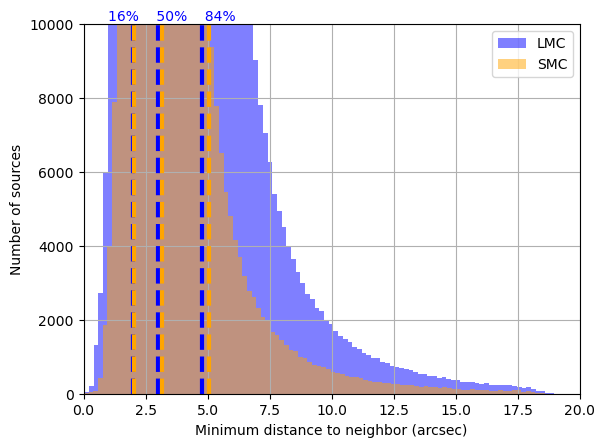

In [16]:
# Print histogram of nearest neighbor distances
lmc.min_dist_to_neighbor.hist(bins=100, alpha=0.5, label='LMC', color='blue')
smc.min_dist_to_neighbor.hist(bins=100, alpha=0.5, label='SMC', color='orange')
plt.xlabel('Minimum distance to neighbor (arcsec)')
plt.ylabel('Number of sources')
plt.xlim(0,20)
plt.ylim(0,10000)

# Plot vertical lines corresponding to percentiles
lmc_percentile = np.percentile(lmc.min_dist_to_neighbor, [16,50,84])
smc_percentile = np.percentile(smc.min_dist_to_neighbor, [16,50,84])
for q in lmc_percentile:
    plt.axvline(q, color='blue', linestyle='--', lw=3)
for q in smc_percentile:
    plt.axvline(q, color='orange', linestyle='--', lw=3)
# Text above the figure for 16, 50 and 84th percentiles
plt.text(0.05, 1.01, f'16%    50%    84%', color='blue', transform=plt.gca().transAxes)
plt.legend()
print('lmc: ',lmc_percentile)
print('smc: ',smc_percentile);

(-73.7, -71.75)

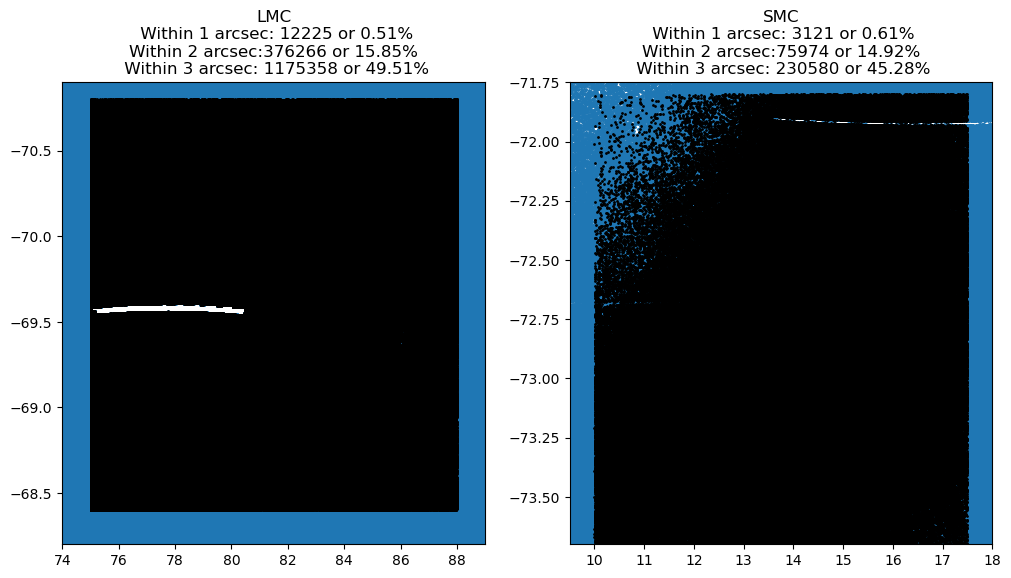

In [17]:
# Visualize the distribution again

f, (ax,bx) = plt.subplots(1, 2, figsize=(12, 6))
ax.scatter(lmc_full.ra,lmc_full.dec,s=1)
ax.scatter(lmc.ra,lmc.dec, s=1, c='black', alpha=1)
ax.set_title(f"LMC\n Within 1 arcsec: {within_1_lmc} or {within_1_lmc/lmc_shape*100:.2f}%\nWithin 2 arcsec:{within_2_lmc} or {within_2_lmc/lmc_shape*100:.2f}%\n Within 3 arcsec: {within_3_lmc} or {within_3_lmc/lmc_shape*100:.2f}%")
bx.scatter(smc_full.ra,smc_full.dec,s=1)
bx.scatter(smc.ra,smc.dec, s=1, c='black', alpha=1)
bx.set_title(f"SMC\n Within 1 arcsec: {within_1_smc} or {within_1_smc/smc_shape*100:.2f}%\nWithin 2 arcsec:{within_2_smc} or {within_2_smc/smc_shape*100:.2f}%\n Within 3 arcsec: {within_3_smc} or {within_3_smc/smc_shape*100:.2f}%")
mid = lmc.iloc[int(lmc.shape[0]/2)]


ax.set_xlim(74,89)
ax.set_ylim(-68.2,-70.9)
bx.set_xlim(9.5,18)
bx.set_ylim(-73.7,-71.75)

Text(0.5, 0.98, 'Black sources have a neigbor within 0-1 arcsec')

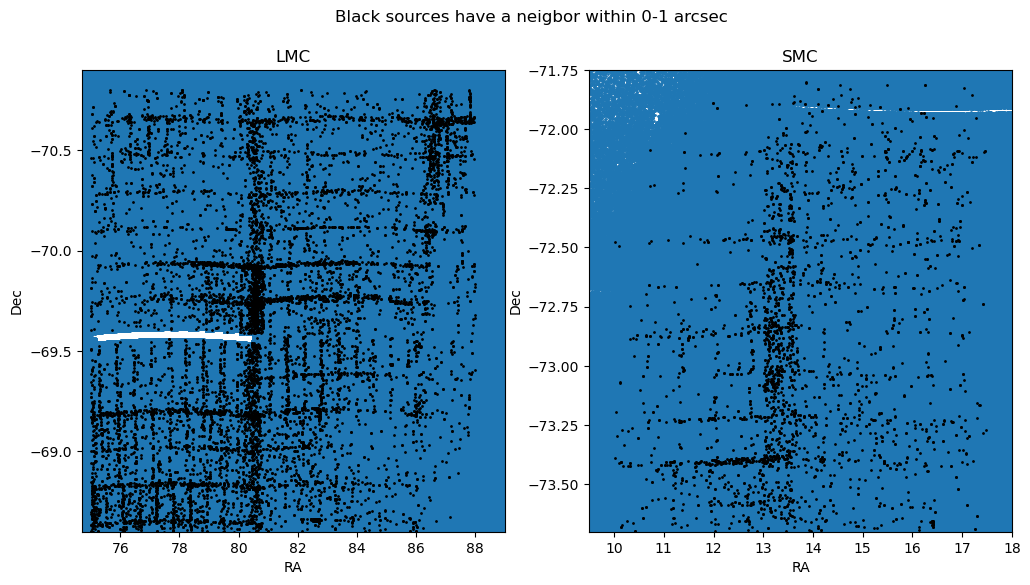

In [ ]:
# Check within a range of distances, scanning strategy is evident
bottom = 0 
top = 1
within_lmc = lmc.loc[(lmc.min_dist_to_neighbor <= top) & (lmc.min_dist_to_neighbor >= bottom)]
within_smc = smc.loc[(smc.min_dist_to_neighbor <= top) & (smc.min_dist_to_neighbor >= bottom)]

f, (ax,bx) = plt.subplots(1, 2, figsize=(12, 6))
ax.scatter(lmc_full.ra,lmc_full.dec,s=1,zorder=0)
ax.scatter(within_lmc.ra,within_lmc.dec, s=1, c='black', alpha=1)
bx.scatter(smc_full.ra,smc_full.dec,s=1)
bx.scatter(within_smc.ra,within_smc.dec, s=1, c='black', alpha=1)

ax.set_xlim(74.7,89) #89
ax.set_ylim(-68.6,-70.9) #-70.9
bx.set_xlim(9.5,18)
bx.set_ylim(-73.7,-71.75)
ax.set_xlabel('RA')
bx.set_xlabel('RA')
ax.set_ylabel('Dec')
bx.set_ylabel('Dec')
ax.set_title('LMC')
bx.set_title('SMC')
plt.suptitle(f'Black sources have a neigbor within {bottom}-{top} arcsec')

Text(0.5, 0.98, 'Black sources have a neigbor within 0.0-1 arcsec')

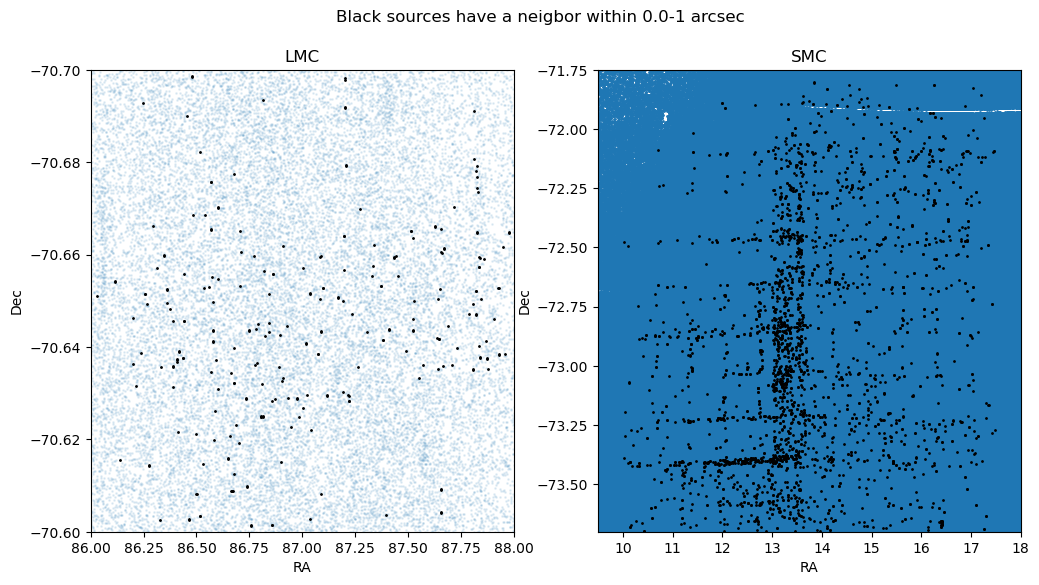

In [ ]:
# Zoom in on a couple of these clusters to see what their properties are
lower_lim = 0.

within_1_lmc = lmc.loc[(lmc.min_dist_to_neighbor < 1) & (lmc.min_dist_to_neighbor > lower_lim)]
within_1_smc = smc.loc[(smc.min_dist_to_neighbor < 1) & (smc.min_dist_to_neighbor > lower_lim)]


width = 0.005
row = lmc.iloc[100000]
rows = lmc_full[(lmc_full['ra']<row['ra']+width) & (lmc_full['ra']>row['ra']-width) & (lmc_full['dec']<row['dec']+width) & (lmc_full['dec']>row['dec']-width)]

f, (ax,bx) = plt.subplots(1, 2, figsize=(12, 6))
ax.scatter(rows.ra,rows.dec,c='r',s=10,zorder=10)
ax.scatter(lmc_full.ra,lmc_full.dec,s=1,zorder=0,alpha=0.1)
ax.scatter(within_1_lmc.ra,within_1_lmc.dec, s=1, c='black', alpha=1)


bx.scatter(smc_full.ra,smc_full.dec,s=1)
bx.scatter(within_1_smc.ra,within_1_smc.dec, s=1, c='black', alpha=1)

mid = lmc.iloc[int(lmc.shape[0]/2)]


ax.set_xlim(86,88) #89
ax.set_ylim(-70.6,-70.7) #-70.9
bx.set_xlim(9.5,18)
bx.set_ylim(-73.7,-71.75)
ax.set_xlabel('RA')
bx.set_xlabel('RA')
ax.set_ylabel('Dec')
bx.set_ylabel('Dec')
ax.set_title('LMC')
bx.set_title('SMC')
plt.suptitle(f'Black sources have a neigbor within {lower_lim}-1 arcsec')

(-68.6, -70.9)

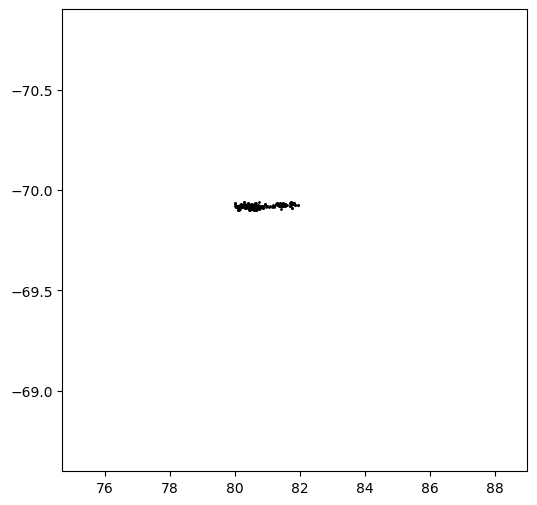

In [20]:
a = within_1_lmc.copy()
ra_lim = [80,82]
dec_lim = [-69.94,-69.9]
cluster = a.loc[(a.ra>ra_lim[0]) & (a.ra<ra_lim[1]) & (a.dec>dec_lim[0]) & (a.dec<dec_lim[1])] 

# make sure i grabbed a cluster
f, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(cluster.ra,cluster.dec,s=1,c='black',alpha=1)
ax.set_xlim(74.7,89) #89
ax.set_ylim(-68.6,-70.9) #-70.9

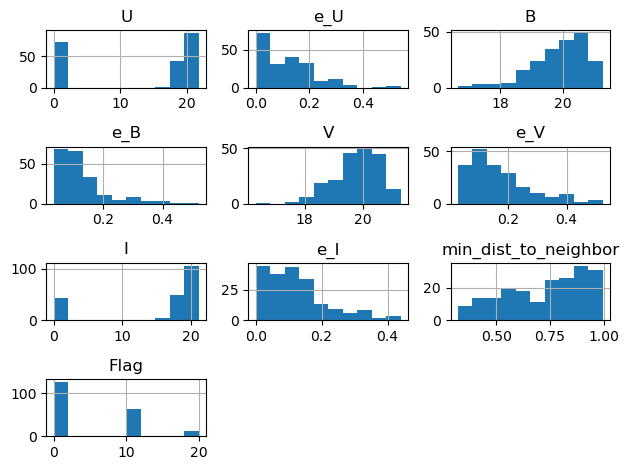

In [30]:
cluster[['U', 'e_U', 'B', 'e_B', 'V','e_V', 'I', 'e_I','min_dist_to_neighbor','Flag']].hist()
plt.tight_layout()

(-68.6, -70.9)

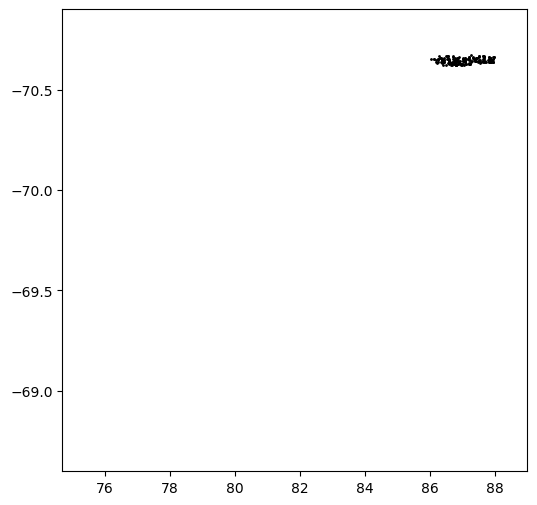

In [22]:
a = within_1_lmc.copy()
ra_lim = [86,88]
dec_lim = [-70.67,-70.62]
cluster = a.loc[(a.ra>ra_lim[0]) & (a.ra<ra_lim[1]) & (a.dec>dec_lim[0]) & (a.dec<dec_lim[1])] 

# make sure i grabbed a cluster
f, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(cluster.ra,cluster.dec,s=1,c='black',alpha=1)
ax.set_xlim(74.7,89) #89
ax.set_ylim(-68.6,-70.9) #-70.9

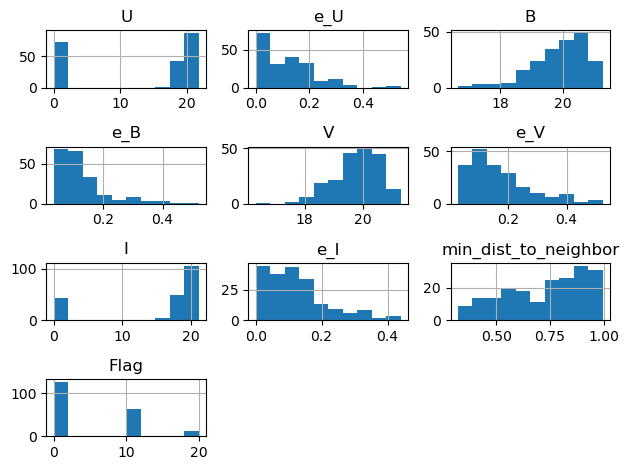

In [29]:
cluster[['U', 'e_U', 'B', 'e_B', 'V','e_V', 'I', 'e_I','min_dist_to_neighbor','Flag']].hist()
plt.tight_layout()

Text(0.5, 0.98, 'Red is SUMS; Black sources have a neigbor within 0-1 arcsec')

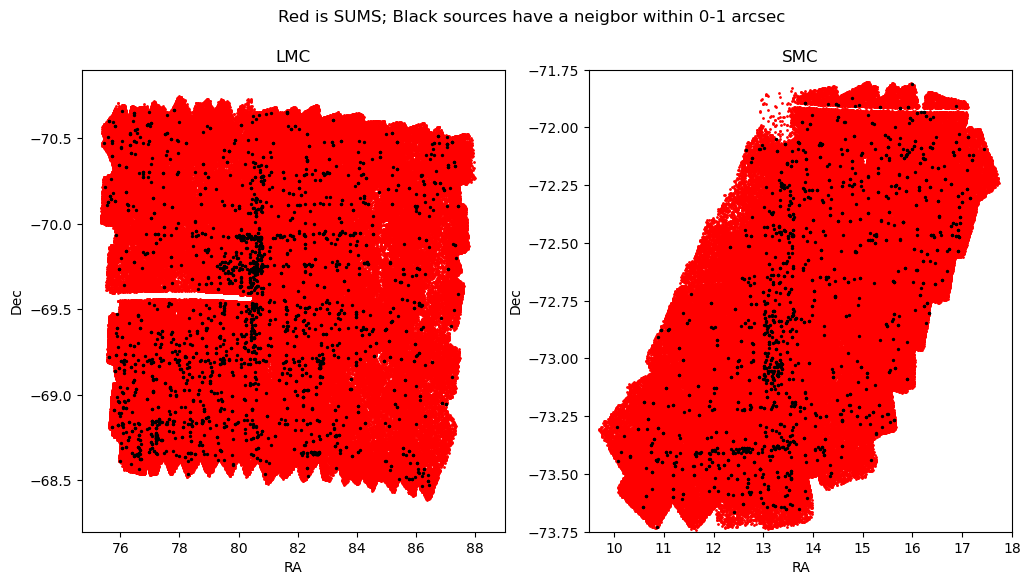

In [31]:
# Is this an issue in our full catalog? Somewhat evident but in under 0.55% of sources
sums = pd.read_csv(data_dir + "0_SUMS_Catalogs/FinalCatalogs/SUMS_UV_Catalog.csv")
sums_smc = sums[sums['RA'] < 30]
sums_lmc = sums[sums['RA'] > 30]

min_dist_lmc = sums_lmc[['UVW1_dist_neighbor','UVW2_dist_neighbor','UVM2_dist_neighbor']].min(axis=1)
min_dist_smc = sums_smc[['UVW1_dist_neighbor','UVW2_dist_neighbor','UVM2_dist_neighbor']].min(axis=1)

bottom = 0 
top = 1
within_sums_lmc = sums_lmc.loc[(min_dist_lmc <= top) & (min_dist_lmc >= bottom)]
within_sums_smc = sums_smc.loc[(min_dist_smc <= top) & (min_dist_smc >= bottom)]

f, (ax,bx) = plt.subplots(1, 2, figsize=(12, 6))
bx.scatter(sums_smc.RA,sums_smc.Dec, s=1, c='red', alpha=1)
ax.scatter(sums_lmc.RA,sums_lmc.Dec, s=1, c='red', alpha=1)

bx.scatter(within_sums_smc.RA,within_sums_smc.Dec, s=2, c='k', alpha=1)
ax.scatter(within_sums_lmc.RA,within_sums_lmc.Dec, s=2, c='k', alpha=1)



ax.set_xlim(74.7,89) #89
ax.set_ylim(-68.2,-70.9) #-70.9

bx.set_xlim(9.5,18)
bx.set_ylim(-73.75,-71.75)
ax.set_xlabel('RA')
bx.set_xlabel('RA')
ax.set_ylabel('Dec')
bx.set_ylabel('Dec')
ax.set_title('LMC')
bx.set_title('SMC')
plt.suptitle(f'Red is SUMS; Black sources have a neigbor within {bottom}-{top} arcsec')


In [32]:
print(within_sums_lmc.shape[0])
print(within_sums_lmc.shape[0]/sums_lmc.shape[0] * 100)
print(within_sums_smc.shape[0])
print(within_sums_smc.shape[0]/sums_smc.shape[0] * 100)

2444
0.5183380098280619
1443
0.5479150370972274
